___
# Atividade: Variáveis qualitativas com a PNAD (ALUNOS)
___

## Aula 02


**Link úteis:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 16 – destacando para variáveis qualitativas.
2.	10 Minutes to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
3.	Essential Basic Functionality: http://pandas.pydata.org/pandas-docs/stable/basics.html
4.  Estude a aula `Aula02 Análise Exploratoria Variáveis Qualitativas-ALUNOS.ipynb`, o qual contém uma introdução ao Jupyter Notebook. A publicação dessa aula tem como objetivo auxiliá-lo, caso queira, no desenvolvimento dos seus próximos programas, como esta atividade.

**Hoje:**
1.	Analisar variáveis qualitativas de forma uni e bivariadas utilizando tabelas de frequências e gráficos de barras e de pizza (ou setor).
2.  Trabalhar com a base de dados da PNAD 2013 - Pesquisa Nacional por Amostra de Domicílios

**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 17 – destacando para variáveis quantitativas; pág. 106 e 107 (Definição 4.1 e Exemplo 4.1).

___


___
## <font color='blue'>PNAD 2013 – PESQUISA NACIONAL POR AMOSTRA DE DOMICÍLIOS</font>

**Base de dados reduzida: ** `pes2013A.txt` (75 MB)
[Acesse a base de dados aqui: https://dl.dropboxusercontent.com/u/65763596/Aula02/pes2013A.txt] 

**Dicionário das variáveis: ** `Dicionário de variáveis de pessoas - PNAD 2013.xlsx`
[Acesse dicionário aqui: https://dl.dropboxusercontent.com/u/65763596/Aula02/Dicion%C3%A1rio%20de%20vari%C3%A1veis%20de%20pessoas%20-%20PNAD%202013.xls]


Muitos especialistas na área de negócios dizem que empresários mais bem sucedidos são aqueles que fazem um planejamento antes de começar seu próprio negócio. Nessa visão, imagine que o Sr. Gold tenha como grande objetivo abrir uma nova faculdade e para isso deseja estudar o perfil do estudante que cursa ensino médio ou pré-vestibular e do que cursa ensino superior. 

Assuma que as variáveis de interesse a respeito dos estudantes sejam relativamente as mesmas de 2013 até o momento atual. Nesse caso, seja criativo para ajudar o Sr. Gold que deseja abrir seu negócio, mas não tem certeza sobre quais variáveis o interessam. 

Vocês podem ajudá-lo?!  

As variáveis a seguir devem fazer parte da sua análise:

* V0302: sexo
* V0404: cor ou raça
* V6002: rede de ensino
* V4802: nível de ensino e grupos de séries do ensino fundamental que frequentavam (todos os estudantes)

** Crie uma variável com região do indivíduo amostrado considerando a variável `UF` que define o estado e também trabalhe com essa nova variável em suas análises. ** 

** Escolha mais pelo menos DUAS variáveis qualitativas para completar sua análise!! **

Faça uma análise exploratória apenas com as variáveis qualitativas com foco no objetivo do Sr. Gold.

Sua análise deve conter pelo menos uma das seguintes visualizações:

1. Gráfico de colunas (bar) e setor (pie) com as frequências relativas cadas categorias das variáveis qualitativas.
2. Tabela cruzada entre pares de variaveis qualitativas. Montar o gráfico de colunas. Repetir o processo habilitando a opção "stacked=True".


___



<font color='red'>
Crie um repositório chamado CD em seu Github
</font>


Neste repositório, salve seu trabalho numa pasta chamada aula2

Por exemplo, se seu login for *pikachu* o projeto vai estar na pasta:

https://github.com/<font color=red>pikachu/CD/aula2</font>



## <font color='red'>Terça-feira (dia 16/08), no horário de atendimento da sua turma, deverá apresentar aos NINJAS!!</font>
___

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
print('Faculdade? Deve ou não deve?')
print(os.getcwd())

Faculdade? Deve ou não deve?
/Users/CaueCitrini/Documents/Graduação Insper/Segundo Semetre 2016:2/Ciência dos Dados/CD/Aula 2


In [3]:
dados = pd.read_table("pes2013A.txt", encoding="windows-1252", sep=" ")

In [4]:
dados.head()

,V0101,UF,V0102,V0103,V0301,V0302,V8005,V0404,V4011,V0412,...,V4706,V4707,V4809,V4810,V4711,V4718,V4720,V4742,V4750,V4729
1,2013,11,15,3,1,4,42,2,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,350,350,350,244
2,2013,11,15,4,1,4,64,8,7,2,...,NaN,NaN,NaN,NaN,NaN,NaN,678,339,339,243
3,2013,11,15,4,2,4,13,4,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,0,339,339,243
4,2013,11,15,5,1,2,23,8,0,2,...,1,3,5,5,1,800,800,266,266,243
5,2013,11,15,5,2,4,19,8,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,0,266,266,243


In [5]:
escolhas = pd.DataFrame()

escolhas["Unidade da federação"] = dados.UF
escolhas["Sexo"] = dados.V0302
escolhas["Cor"] = dados.V0404
escolhas["Rede de ensino"] = dados.V6002
escolhas["Nivel de ensino"] = dados.V4802
escolhas["Curso mais elevado que frequentou"] = dados.V6007
escolhas["Concluiu esse curso?"] = dados.V0611
escolhas["Anos de estudos"] = dados.V4803
escolhas["Regiões"] = dados.UF


n = len(escolhas)

escolhas.Regiões = pd.Series([""]*n)

escolhas.Regiões[(dados.UF>=11) & (dados.UF<=17)] = "Norte"
escolhas.Regiões[(dados.UF>=21) & (dados.UF<=29)] = "Nordeste"
escolhas.Regiões[(dados.UF>=31) & (dados.UF<=35)] = "Sudeste"
escolhas.Regiões[(dados.UF>=41) & (dados.UF<=43)] = "Sul"
escolhas.Regiões[(dados.UF>=50) & (dados.UF<=53)] = "Centro-Oeste"

escolhas.Regiões.value_counts()

/Users/CaueCitrini/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/CaueCitrini/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/CaueCitrini/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/CaueCitrini/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A val

Sudeste         105128
Nordeste        104597
Norte            59187
Sul              56116
Centro-Oeste     37527
Name: Regiões, dtype: int64

In [6]:
escolhas.UF = dados.UF.astype('category')
escolhas.UF.cat.categories = ('Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará',
                              'Amapá', 'Tocantins', 'Maranhão','Piauí', 'Ceará',
                              'Rio Grande do Norte','Paraíba', 'Pernambuco', 'Alagoas', 
                              'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 
                              'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 
                              'Rio Grande do Sul','Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 
                              'Distrito Federal')

escolhas.sexo = dados.V0302.astype('category')
escolhas.sexo.cat.categories = ("Masculino", "Feminino")

escolhas.cor = dados.V0404.astype('category')
escolhas.cor.cat.categories = ("Branco", "Preto", "Amarelo",
                              "Pardo", "Indígena", "Sem declaração")

escolhas.rede_de_ensino = dados.V6002.astype('category')
escolhas.rede_de_ensino.cat.categories = ("Pública", "Privada")

escolhas.nivel_de_ensino = dados.V4802.astype('category')
escolhas.nivel_de_ensino.cat.categories = ('Maternal/jardim', 'Classe de alfabetização', 
                                           'Alfabetização de adultos', '1a - 4a série E.F. (regular em 8 anos)', 
                                           '5a - 8a série E.F. (regular em 8 anos)', '1a série do E.F. (regular em 9 anos)', 
                                           '2a - 5a série do E.F. (regular em 9 anos)', '6a - 9a série do E.F. (regular em 9 anos)', 
                                           'Educação de jovens/adultos nao seriados do E.F.', 'E.M. inclusive pré-vestibular', 
                                           'Ensino superior/mestrado/doutorado') 

escolhas.curso_mais_elevado = dados.V6007.astype('category')
escolhas.curso_mais_elevado.cat.categories = ('Elementar', 'Médio 1o ciclo', 'Médio 2o ciclo', 'Regular do E.F.',
                                              'Regular do E.M.', 'Supletivo do E.F.', 'Supletivo do E.M.', 'ensino superior',
                                              'Mestrado/doutorado', 'Alfabetização (jovens/adultos)', 'Creches', 
                                              'Classe de alfabetização', 'Maternal/jardim') 

escolhas.concluiu_esse_curso = dados.V0611.astype('category')
escolhas.concluiu_esse_curso.cat.categories = ("Sim", "Não")

escolhas.anos_de_estudos = dados.V4803.astype('category')
escolhas.anos_de_estudos.cat.categories = ('Sem intrução e menos de 1 ano', '1 ano', '2 anos'
                                          '3 anos', '4 anos', '5 anos', '6 anos', '7 anos', '8 anos',
                                          '9 anos', '10 anos', '11 anos', '12 anos', '13 anos', '14 anos',
                                          '15 anos', 'Não determinados', 'Não aplicável')

escolhas

,Unidade da federação,Sexo,Cor,Rede de ensino,Nivel de ensino,Curso mais elevado que frequentou,Concluiu esse curso?,Anos de estudos,Regiões
1,11,4,2,NaN,NaN,4,3,6,Norte
2,11,4,8,NaN,NaN,NaN,NaN,1,Norte
3,11,4,4,2,8,NaN,NaN,6,Norte
4,11,2,8,NaN,NaN,NaN,NaN,1,Norte
5,11,4,8,4,11,NaN,NaN,12,Norte
6,11,4,8,4,10,NaN,NaN,11,Norte
7,11,2,4,NaN,NaN,4,3,6,Norte
8,11,4,2,NaN,NaN,4,3,4,Norte
9,11,2,8,NaN,NaN,4,3,8,Norte
10,11,4,2,NaN,NaN,5,1,12,Norte


In [7]:
ut1 = escolhas.UF.value_counts(True)*100
ut1

São Paulo              10.903449
Minas Gerais            9.139855
Bahia                   7.515274
Rio Grande do Sul       7.499276
Rio de Janeiro          7.094924
Pará                    6.193543
Pernambuco              5.671140
Ceará                   5.274234
Paraná                  5.252996
Goiás                   4.052075
Amazonas                3.592007
Santa Catarina          2.725655
Distrito Federal        2.581953
Maranhão                2.556853
Mato Grosso             1.971563
Rondônia                1.963840
Espírito Santo          1.858201
Tocantins               1.780971
Mato Grosso do Sul      1.745115
Paraíba                 1.706500
Sergipe                 1.679469
Piauí                   1.542387
Alagoas                 1.506254
Rio Grande do Norte     1.397857
Acre                    1.234295
Amapá                   0.797120
Roraima                 0.763195
dtype: float64

In [8]:
ut2 = escolhas.sexo.value_counts(True)*100
ut2

Feminino     51.427508
Masculino    48.572492
dtype: float64

In [9]:
ut3 = escolhas.cor.value_counts(True)*100
ut3

Indígena          48.004303
Preto             42.812263
Amarelo            8.310463
Branco             0.465585
Pardo              0.405732
Sem declaração     0.001655
dtype: float64

In [10]:
ut4 = escolhas.rede_de_ensino.value_counts(True)*100
ut4

Pública    21.501565
Privada     6.947636
dtype: float64

In [11]:
ut5 = escolhas.nivel_de_ensino.value_counts(True)*100
ut5

2a - 5a série do E.F. (regular em 9 anos)          7.005006
6a - 9a série do E.F. (regular em 9 anos)          6.336142
E.M. inclusive pré-vestibular                      4.800099
Ensino superior/mestrado/doutorado                 3.763291
Maternal/jardim                                    1.735737
1a série do E.F. (regular em 9 anos)               1.568038
5a - 8a série E.F. (regular em 8 anos)             0.596323
1a - 4a série E.F. (regular em 8 anos)             0.301196
Classe de alfabetização                            0.295955
Educação de jovens/adultos nao seriados do E.F.    0.130463
Alfabetização de adultos                           0.119982
dtype: float64

In [12]:
ut6 = escolhas.curso_mais_elevado.value_counts(True)*100
ut6

Regular do E.M.                   20.823048
Regular do E.F.                   18.689854
ensino superior                    8.796458
Elementar                          8.359835
Médio 1o ciclo                     1.694915
Supletivo do E.M.                  1.062735
Médio 2o ciclo                     1.033223
Supletivo do E.F.                  0.627215
Mestrado/doutorado                 0.436072
Classe de alfabetização            0.284646
Alfabetização (jovens/adultos)     0.186730
Creches                            0.105088
Maternal/jardim                    0.054061
dtype: float64

In [13]:
ut7 = escolhas.concluiu_esse_curso.value_counts(True)*100
ut7

Sim    35.380563
Não    23.060501
dtype: float64

In [14]:
ut8 = escolhas.anos_de_estudos.value_counts(True)*100
ut8

Sem intrução e menos de 1 ano    19.768863
12 anos                          19.353477
9 anos                            8.712885
5 anos                            8.301085
Não determinados                  7.735654
6 anos                            5.691826
4 anos                            4.590752
7 anos                            3.899270
2 anos3 anos                      3.842176
8 anos                            3.785908
10 anos                           3.047538
11 anos                           3.039815
1 ano                             3.036505
13 anos                           2.159397
15 anos                           1.459916
14 anos                           1.327247
Não aplicável                     0.247687
dtype: float64

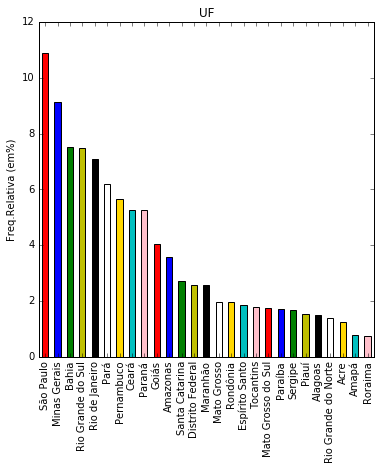

In [15]:
plot = ut1.plot(kind='bar',title='UF',figsize=(6, 6), color=('r','b','g','y','black','w','gold','c','pink'))
plt.ylabel('Freq.Relativa (em%)')


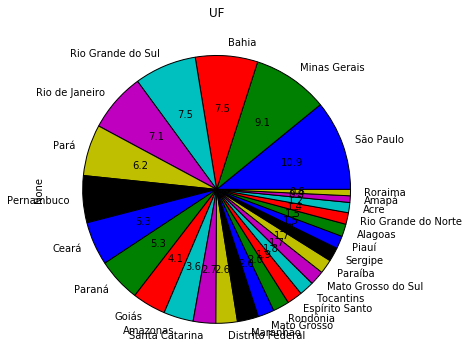

In [16]:
plot = ut1.plot(kind='pie',title='UF',autopct='%.1f',figsize=(6, 6))

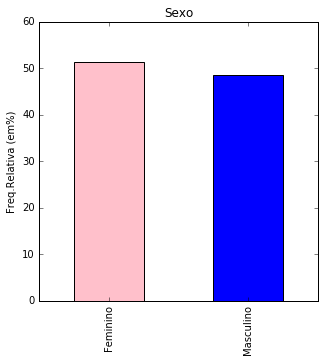

In [17]:
plot = ut2.plot(kind='bar',title='Sexo',figsize=(5, 5),color=('pink','b'))
plt.ylabel('Freq.Relativa (em%)')


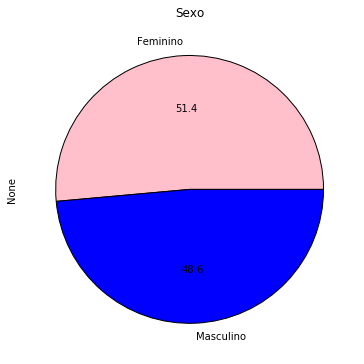

In [18]:
plot = ut2.plot(kind='pie',colors=('pink','b'), title='Sexo',autopct='%.1f',figsize=(6, 6))

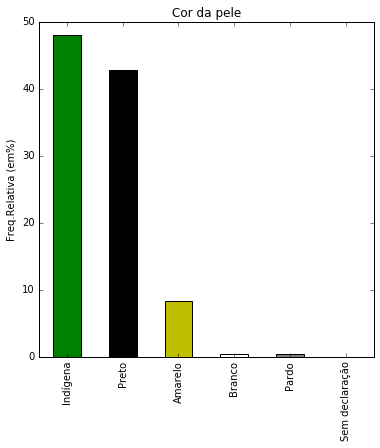

In [19]:
plot = ut3.plot(kind='bar',title='Cor da pele',figsize=(6, 6),color=('g','black', 'y', 'white', 'gray', 'red'))
plt.ylabel('Freq.Relativa (em%)')


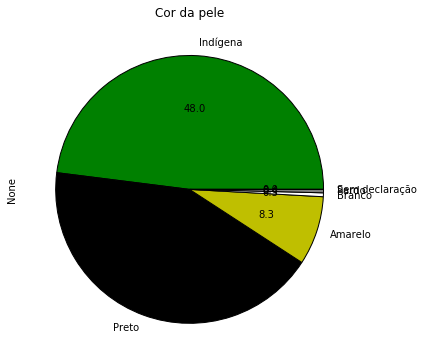

In [20]:
plot = ut3.plot(kind='pie', colors=('g','black', 'y', 'white', 'gray', 'red'), title='Cor da pele',autopct='%.1f',figsize=(6, 6))

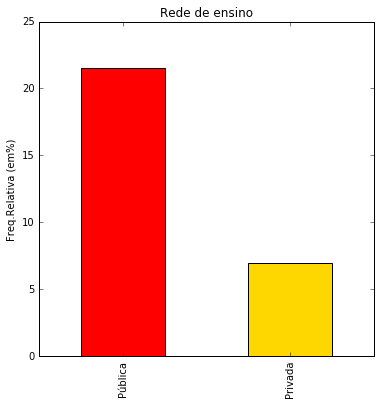

In [21]:
plot = ut4.plot(kind='bar',title='Rede de ensino',figsize=(6, 6), color=('r','gold'))
plt.ylabel('Freq.Relativa (em%)')


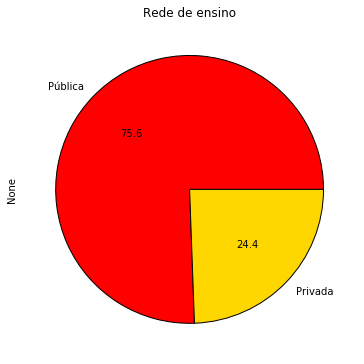

In [22]:
plot = ut4.plot(kind='pie', colors=('r','gold'), title='Rede de ensino',autopct='%.1f',figsize=(6, 6))

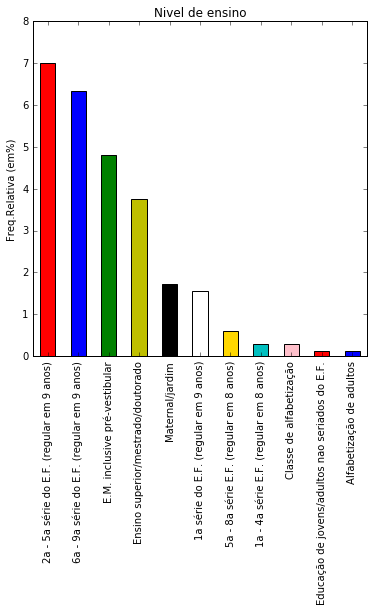

In [23]:
plot = ut5.plot(kind='bar',title='Nivel de ensino',figsize=(6, 6), color=('r','b','g','y','black','w','gold','c','pink'))
plt.ylabel('Freq.Relativa (em%)')


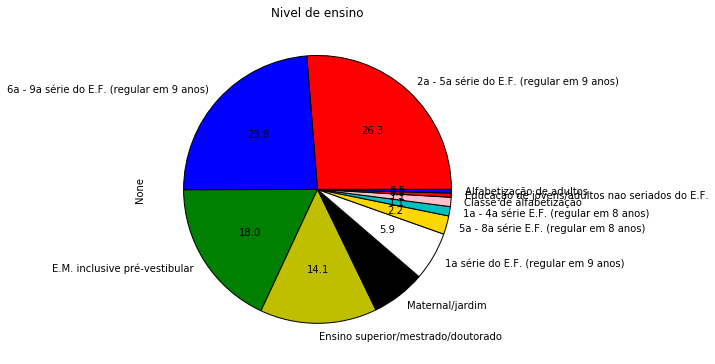

In [24]:
plot = ut5.plot(kind='pie', colors=('r','b','g','y','black','w','gold','c','pink'), title='Nivel de ensino',autopct='%.1f',figsize=(6, 6))

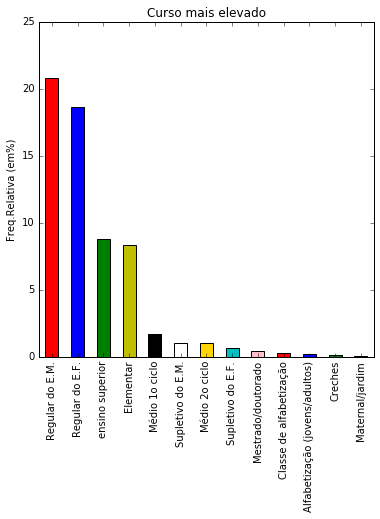

In [25]:
plot = ut6.plot(kind='bar',title='Curso mais elevado',figsize=(6, 6), color=('r','b','g','y','black','w','gold','c','pink'))
plt.ylabel('Freq.Relativa (em%)')


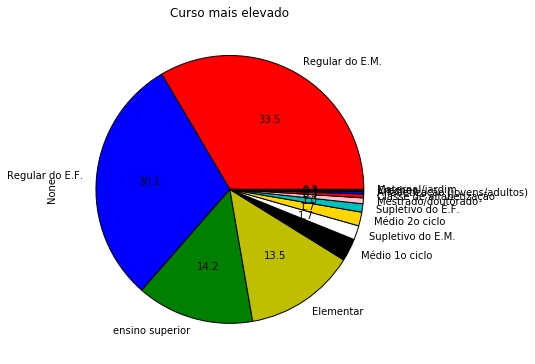

In [26]:
plot = ut6.plot(kind='pie', colors=('r','b','g','y','black','w','gold','c','pink'), title='Curso mais elevado',autopct='%.1f',figsize=(6, 6))

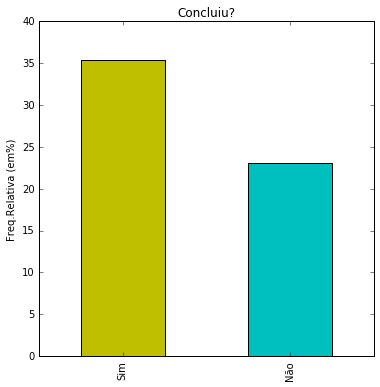

In [27]:
plot = ut7.plot(kind='bar',title='Concluiu?',figsize=(6, 6), color=('y', 'c'))
plt.ylabel('Freq.Relativa (em%)')


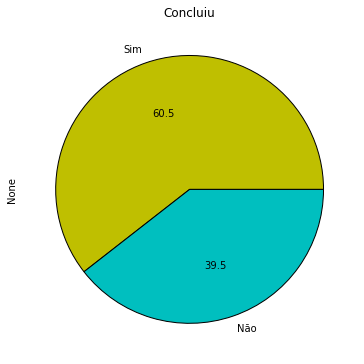

In [28]:
plot = ut7.plot(kind='pie', colors=('y', 'c'), title='Concluiu',autopct='%.1f',figsize=(6, 6))

In [29]:
print('Tabela Cruzada por total CURSO MAIS ELEVADO vs CONLUIU ESTE CURSO:')
ct=pd.crosstab(escolhas.curso_mais_elevado,escolhas.concluiu_esse_curso,margins=True,rownames=['Curso'], colnames=['Concluiu?'])
ct

Tabela Cruzada por total CURSO MAIS ELEVADO vs CONLUIU ESTE CURSO:


Concluiu?,Sim,Não,All
Curso,,,
Elementar,9956,16072,30309
Médio 1o ciclo,3051,2635,6145
Médio 2o ciclo,2944,652,3746
Regular do E.F.,18630,44887,67761
Regular do E.M.,61280,11760,75495
Supletivo do E.F.,726,1364,2274
Supletivo do E.M.,3224,541,3853
ensino superior,26692,4177,31892
Mestrado/doutorado,1494,87,1581


In [30]:
print('Tabela Cruzada por CURSO MAIS ELEVADO vs CONLUIU ESTE CURSO (em %):')
ct1=(ct/len(escolhas)*100).round(decimals=0)
ct1

Tabela Cruzada por CURSO MAIS ELEVADO vs CONLUIU ESTE CURSO (em %):


,Sim,Não,All
Curso,,,
Elementar,3,4,8
Médio 1o ciclo,1,1,2
Médio 2o ciclo,1,0,1
Regular do E.F.,5,12,19
Regular do E.M.,17,3,21
Supletivo do E.F.,0,0,1
Supletivo do E.M.,1,0,1
ensino superior,7,1,9
Mestrado/doutorado,0,0,0


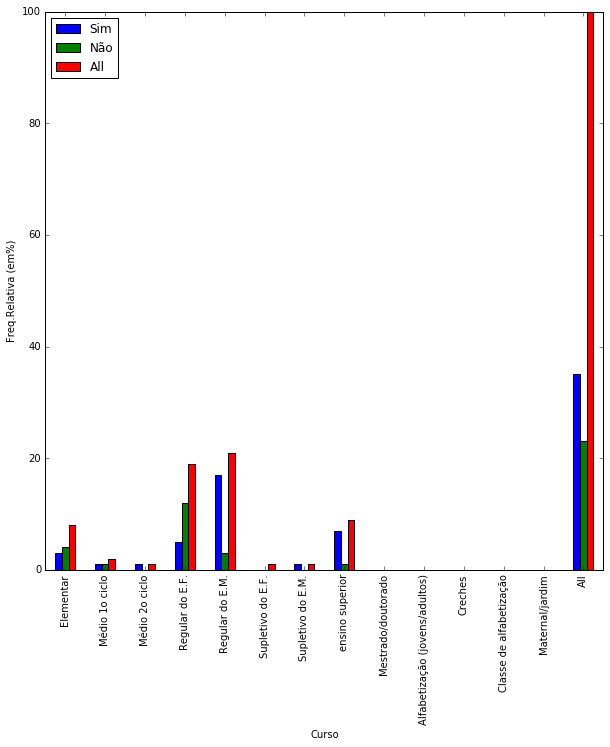

In [31]:
ct1 = pd.crosstab(escolhas.curso_mais_elevado,escolhas.concluiu_esse_curso,margins=True,rownames=['Curso'], colnames=['Concluiu?'])

ct1 = (ct1/len(escolhas)*100).round(decimals=0)
plot = ct1.plot(kind='bar', figsize=(10, 10))
plt.ylabel('Freq.Relativa (em%)')

Concluiu?,Sim,Não,All
Cursos,,,
Elementar,33,53,100
Médio 1o ciclo,50,43,100
Médio 2o ciclo,79,17,100
Regular do E.F.,27,66,100
Regular do E.M.,81,16,100
Supletivo do E.F.,32,60,100
Supletivo do E.M.,84,14,100
ensino superior,84,13,100
Mestrado/doutorado,94,6,100


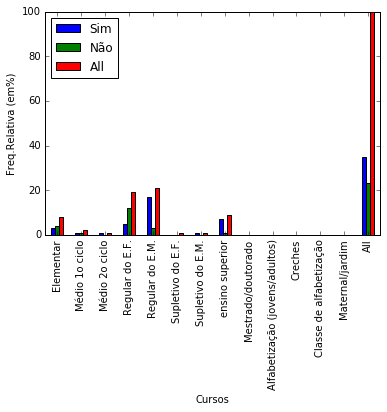

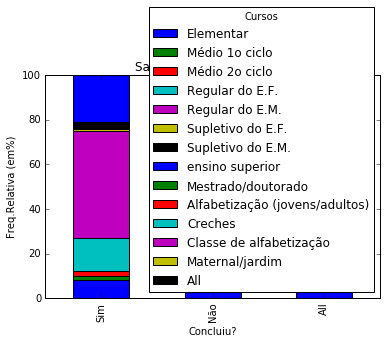

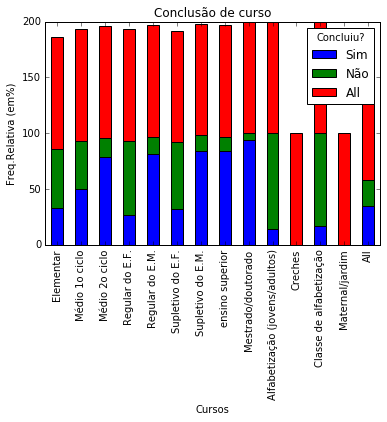

In [32]:
def porcentagem(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)



#Analise Curso mais elevado x Concluiu este curso
x1 = pd.crosstab(escolhas.curso_mais_elevado, escolhas.concluiu_esse_curso, margins=True, rownames=['Cursos'], colnames=['Concluiu?'])
x1 = (x1/len(escolhas)*100).round(decimals=0)

plot = x1.plot(kind='bar')
plt.ylabel('Freq.Relativa (em%)')
x1


x2 = pd.crosstab(escolhas.curso_mais_elevado, escolhas.concluiu_esse_curso, margins=True, rownames=['Cursos'], colnames=['Concluiu?']).apply(porcentagem, axis=0)

plot = x2.T.plot(kind='bar', stacked=True,title='Satisfação em cada Plano')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
x2


x3 = pd.crosstab(escolhas.curso_mais_elevado, escolhas.concluiu_esse_curso, margins=True, rownames=['Cursos'], colnames=['Concluiu?']).apply(porcentagem, axis=1)

plot = x3.plot(kind='bar', stacked=True,title='Conclusão de curso')
plt.ylabel('Freq.Relativa (em%)')
x3

In [33]:
print('Tabela Cruzada por total UF vs CURSO MAIS ELEVADO:')
y1=pd.crosstab(escolhas.UF, escolhas.curso_mais_elevado, margins=True, rownames=['UF'], colnames=['Curso'])
y1

Tabela Cruzada por total UF vs CURSO MAIS ELEVADO:


Curso,Elementar,Médio 1o ciclo,Médio 2o ciclo,Regular do E.F.,Regular do E.M.,Supletivo do E.F.,Supletivo do E.M.,ensino superior,Mestrado/doutorado,Alfabetização (jovens/adultos),Creches,Classe de alfabetização,Maternal/jardim,All
UF,,,,,,,,,,,,,,
Rondônia,553,40,10,1656,1237,66,98,422,15,4,8,7,3,7120
Acre,146,21,16,766,729,54,57,281,3,13,4,9,2,4475
Amazonas,484,115,80,2169,2690,85,107,823,34,20,8,26,13,13023
Roraima,121,20,9,407,610,27,58,220,4,3,6,8,2,2767
Pará,1451,232,151,4776,4790,122,94,1109,56,24,9,27,20,22455
Amapá,92,14,9,496,664,13,24,205,5,7,1,1,2,2890
Tocantins,554,50,25,1144,1226,36,42,485,9,3,10,18,2,6457
Maranhão,577,92,37,1730,1523,76,44,368,12,43,2,173,3,9270
Piauí,471,70,32,1214,819,54,31,261,21,82,5,17,2,5592


In [34]:
print('Tabela Cruzada por CURSO MAIS ELEVADO vs CONLUIU ESTE CURSO (em %):')
y2=(y1/len(escolhas)*100).round(decimals=0)
y2

Tabela Cruzada por CURSO MAIS ELEVADO vs CONLUIU ESTE CURSO (em %):


,Elementar,Médio 1o ciclo,Médio 2o ciclo,Regular do E.F.,Regular do E.M.,Supletivo do E.F.,Supletivo do E.M.,ensino superior,Mestrado/doutorado,Alfabetização (jovens/adultos),Creches,Classe de alfabetização,Maternal/jardim,All
UF,,,,,,,,,,,,,,
Rondônia,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Acre,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Amazonas,0,0,0,1,1,0,0,0,0,0,0,0,0,4
Roraima,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Pará,0,0,0,1,1,0,0,0,0,0,0,0,0,6
Amapá,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Tocantins,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Maranhão,0,0,0,0,0,0,0,0,0,0,0,0,0,3
Piauí,0,0,0,0,0,0,0,0,0,0,0,0,0,2


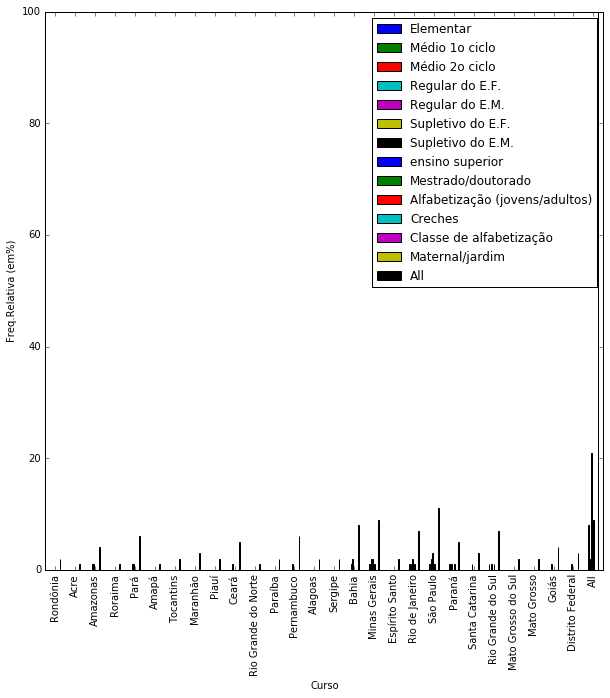

In [35]:
ultimo = pd.crosstab(escolhas.UF, escolhas.curso_mais_elevado, margins=True, rownames=['Curso'], colnames=['Concluiu?'])

ultimo = (ultimo/len(escolhas)*100).round(decimals=0)
plot = ultimo.plot(kind='bar', figsize=(10, 10))
plt.ylabel('Freq.Relativa (em%)')

Cursos,Elementar,Médio 1o ciclo,Médio 2o ciclo,Regular do E.F.,Regular do E.M.,Supletivo do E.F.,Supletivo do E.M.,ensino superior,Mestrado/doutorado,Alfabetização (jovens/adultos),Creches,Classe de alfabetização,Maternal/jardim,All
UF,,,,,,,,,,,,,,
Rondônia,8,1,0,23,17,1,1,6,0,0,0,0,0,100
Acre,3,0,0,17,16,1,1,6,0,0,0,0,0,100
Amazonas,4,1,1,17,21,1,1,6,0,0,0,0,0,100
Roraima,4,1,0,15,22,1,2,8,0,0,0,0,0,100
Pará,6,1,1,21,21,1,0,5,0,0,0,0,0,100
Amapá,3,0,0,17,23,0,1,7,0,0,0,0,0,100
Tocantins,9,1,0,18,19,1,1,8,0,0,0,0,0,100
Maranhão,6,1,0,19,16,1,0,4,0,0,0,2,0,100
Piauí,8,1,1,22,15,1,1,5,0,1,0,0,0,100


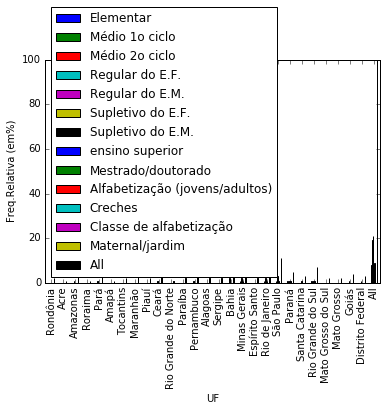

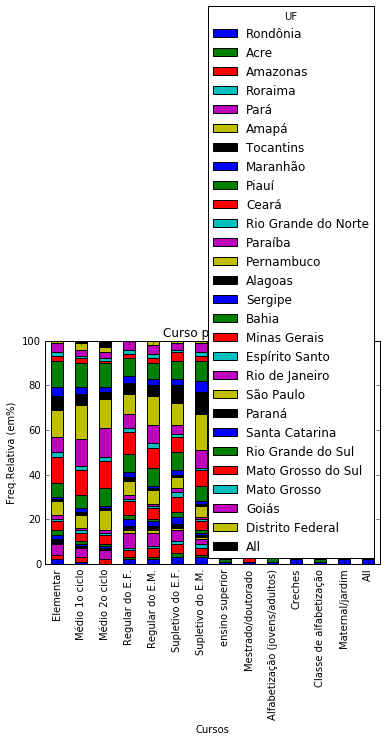

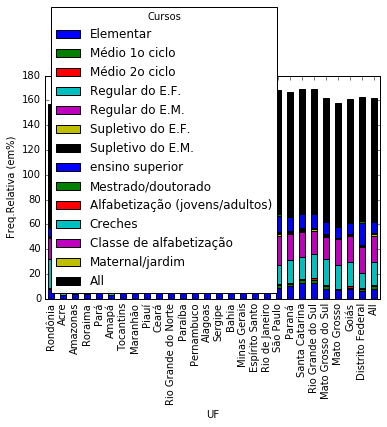

In [36]:
def porcentagem(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)



#Analise Curso mais elevado x Concluiu este curso
w = pd.crosstab(escolhas.UF, escolhas.curso_mais_elevado, margins=True, rownames=['UF'], colnames=['Cursos'])
w = (w/len(escolhas)*100).round(decimals=0)

plot = w.plot(kind='bar')
plt.ylabel('Freq.Relativa (em%)')
w


z = pd.crosstab(escolhas.UF, escolhas.curso_mais_elevado, margins=True, rownames=['UF'], colnames=['Cursos']).apply(porcentagem, axis=0)

plot = z.T.plot(kind='bar', stacked=True,title='Curso por região')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
z


d = pd.crosstab(escolhas.UF, escolhas.curso_mais_elevado, margins=True, rownames=['UF'], colnames=['Cursos']).apply(porcentagem, axis=1)

plot = d.plot(kind='bar', stacked=True,title='Curso por região')
plt.ylabel('Freq.Relativa (em%)')
d

In [37]:
print('Tabela Cruzada por total UF vs CURSO MAIS ELEVADO:')
oi=pd.crosstab(escolhas.Regiões, escolhas.curso_mais_elevado,margins=True,rownames=['Regiões'], colnames=['Curso'])
oi

Tabela Cruzada por total UF vs CURSO MAIS ELEVADO:


Curso,Elementar,Médio 1o ciclo,Médio 2o ciclo,Regular do E.F.,Regular do E.M.,Supletivo do E.F.,Supletivo do E.M.,ensino superior,Mestrado/doutorado,Alfabetização (jovens/adultos),Creches,Classe de alfabetização,Maternal/jardim,All
Regiões,,,,,,,,,,,,,,
Centro-Oeste,2708,583,275,6713,7685,194,403,4295,248,16,40,35,26,37527
Nordeste,7461,1460,1046,21125,20725,731,819,6253,335,441,107,770,66,104597
Norte,3401,492,300,11414,11946,403,480,3545,126,74,46,96,44,59187
Sudeste,10051,2460,1490,18152,23939,526,1249,11683,574,95,96,91,39,105128
Sul,6688,1150,635,10357,11200,420,902,6116,298,51,92,40,21,56116
All,30309,6145,3746,67761,75495,2274,3853,31892,1581,677,381,1032,196,362555


In [38]:
print('Tabela Cruzada por total UF vs CURSO MAIS ELEVADO (em %):')
oi1=(oi/len(escolhas)*100).round(decimals=0)
oi1

Tabela Cruzada por total UF vs CURSO MAIS ELEVADO (em %):


,Elementar,Médio 1o ciclo,Médio 2o ciclo,Regular do E.F.,Regular do E.M.,Supletivo do E.F.,Supletivo do E.M.,ensino superior,Mestrado/doutorado,Alfabetização (jovens/adultos),Creches,Classe de alfabetização,Maternal/jardim,All
Regiões,,,,,,,,,,,,,,
Centro-Oeste,1,0,0,2,2,0,0,1,0,0,0,0,0,10
Nordeste,2,0,0,6,6,0,0,2,0,0,0,0,0,29
Norte,1,0,0,3,3,0,0,1,0,0,0,0,0,16
Sudeste,3,1,0,5,7,0,0,3,0,0,0,0,0,29
Sul,2,0,0,3,3,0,0,2,0,0,0,0,0,15
All,8,2,1,19,21,1,1,9,0,0,0,0,0,100


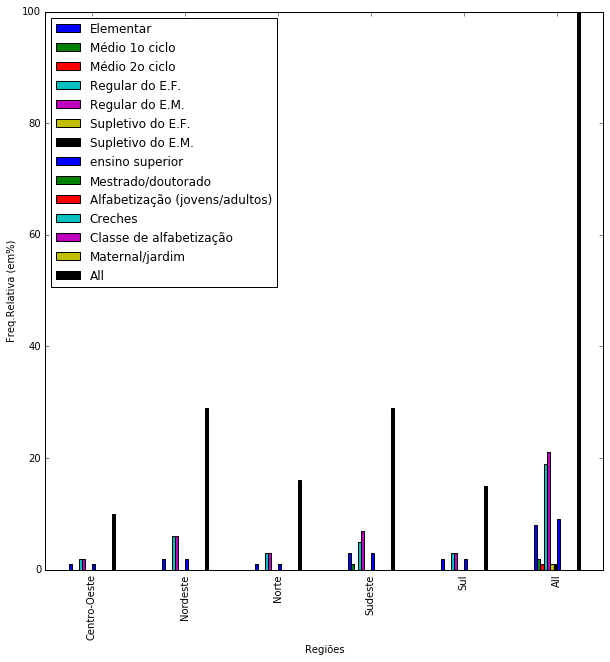

In [40]:
oi2 = pd.crosstab(escolhas.Regiões, escolhas.curso_mais_elevado, margins=True, rownames=['Regiões'], colnames=['Curso'])

oi2 = (oi2/len(escolhas)*100).round(decimals=0)
plot = oi2.plot(kind='bar', figsize=(10, 10))
plt.ylabel('Freq.Relativa (em%)')

In [57]:
tab_conclu = oi2.iloc[:5,:12]

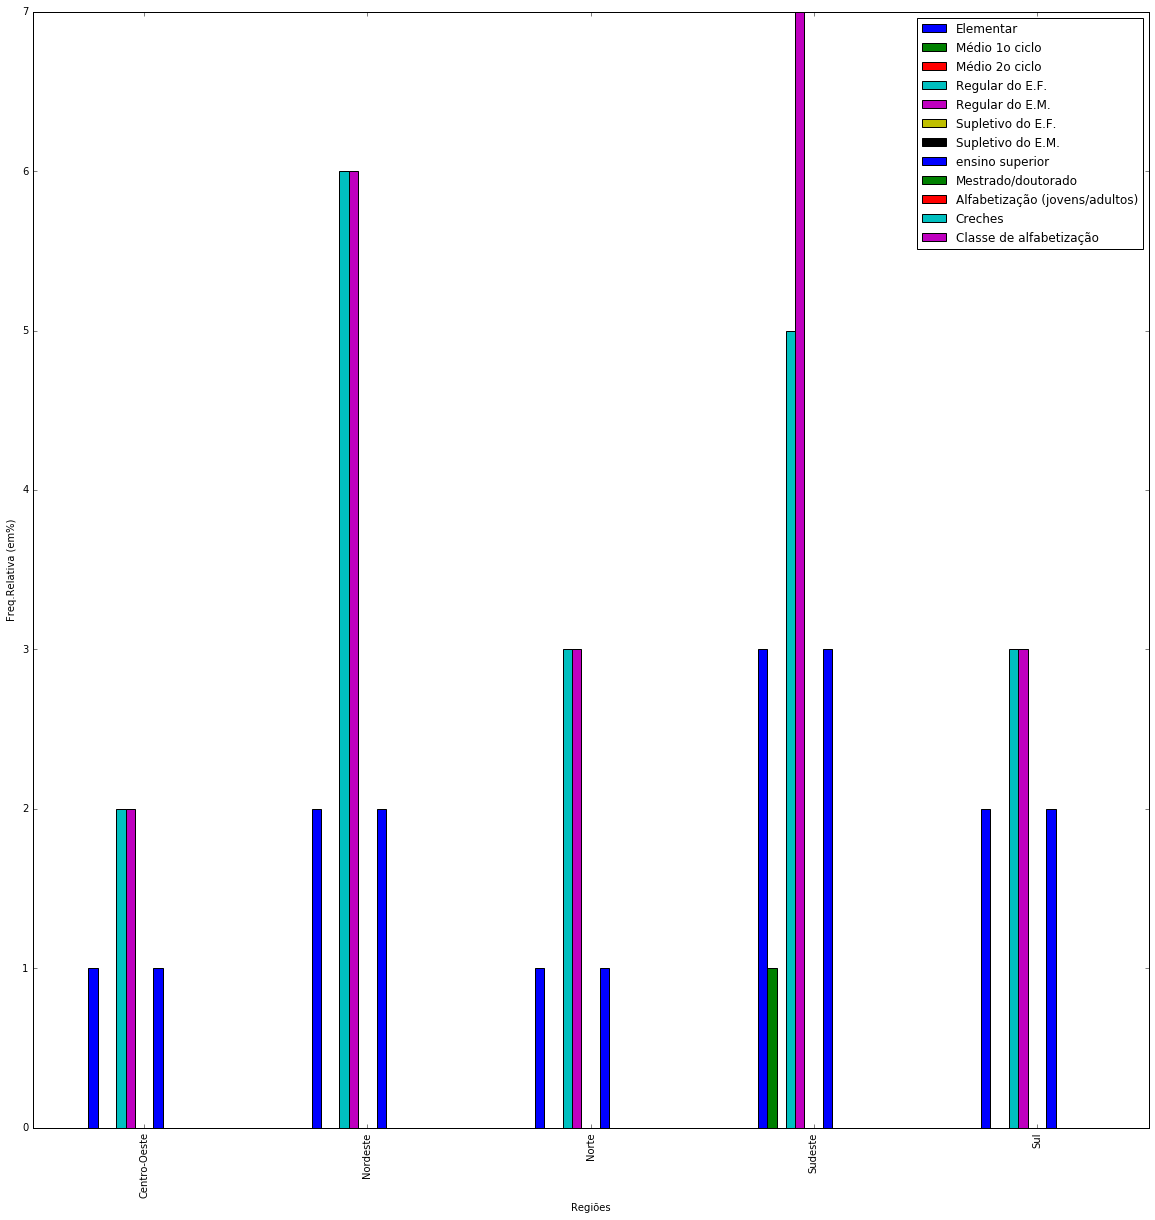

In [60]:
plot = tab_conclu.plot(kind='bar', figsize=(20, 20))
plt.ylabel('Freq.Relativa (em%)')